Urban Sounds Classification
Global AI Hub - Deep Learning Bootcamp Project

Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [53]:
images = []
# Function for reading images from folders
def load_images(folder, spect_class):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            # Resizing image (%30)
            scale_percent = 30 
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

            # Normalization
            img = img / 255

            # Adding images with their classes
            x = [img, spect_class]
            images.append(tuple(x))

In [54]:
# Reading images from spectogram folders
for i in range(10):
    folder = str(i)
    load_images(folder, i)

In [55]:
len(images)

8732

In [56]:
X = []
y = []
for element in images:
    X.append(element[0])
    y.append(element[1])

In [57]:
print(f"Size of X: {len(X)}")
print(f"Size of y: {len(y)}")

Size of X: 8732
Size of y: 8732


In [58]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(f"Size of X_train: {len(X_train)}")
print(f"Size of X_test: {len(X_test)}")
print(f"Size of y_train: {len(y_train)}")
print(f"Size of y_test: {len(y_test)}")

Size of X_train: 6985
Size of X_test: 1747
Size of y_train: 6985
Size of y_test: 1747


(112, 150, 3)


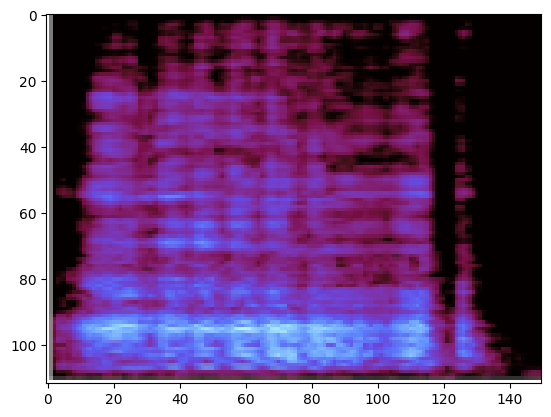

In [60]:
plt.imshow(X_test[789])
print(X_test[789].shape)

In [61]:
# Creating validation dataset
X_val = X_train[5238:]
y_val = y_train[5238:]

X_train = X_train[:5238]
y_train = y_train[:5238]

In [62]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [63]:
print(f"Size of X_train: {len(X_train)}")
print(f"Size of X_val: {len(X_val)}")
print(f"Size of X_test: {len(X_test)}")

Size of X_train: 5238
Size of X_val: 1747
Size of X_test: 1747


Creating the CNN Model

In [64]:
model = tf.keras.Sequential()

Adding convolution layers

In [65]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(112, 150, 3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(112, 150, 3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(112, 150, 3)))

In [66]:
model.add(tf.keras.layers.Flatten())

In [67]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.6))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.6))

In [68]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [69]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [70]:
results = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
164/164 [==============================] - 64s 384ms/step - loss: 2.1761 - accuracy: 0.1793 - val_loss: 1.9021 - val_accuracy: 0.3406
Epoch 2/20
164/164 [==============================] - 64s 392ms/step - loss: 1.9496 - accuracy: 0.2585 - val_loss: 1.5778 - val_accuracy: 0.4614
Epoch 3/20
164/164 [==============================] - 68s 415ms/step - loss: 1.7503 - accuracy: 0.3372 - val_loss: 1.4798 - val_accuracy: 0.5358
Epoch 4/20
164/164 [==============================] - 69s 423ms/step - loss: 1.6246 - accuracy: 0.3876 - val_loss: 1.3281 - val_accuracy: 0.6119
Epoch 5/20
164/164 [==============================] - 72s 437ms/step - loss: 1.5002 - accuracy: 0.4336 - val_loss: 1.2227 - val_accuracy: 0.6308
Epoch 6/20
164/164 [==============================] - 76s 464ms/step - loss: 1.4153 - accuracy: 0.4779 - val_loss: 1.0458 - val_accuracy: 0.6920
Epoch 7/20
164/164 [==============================] - 83s 506ms/step - loss: 1.3073 - accuracy: 0.5166 - val_loss: 1.0267 - val_ac

Loss and Accuracy Plots

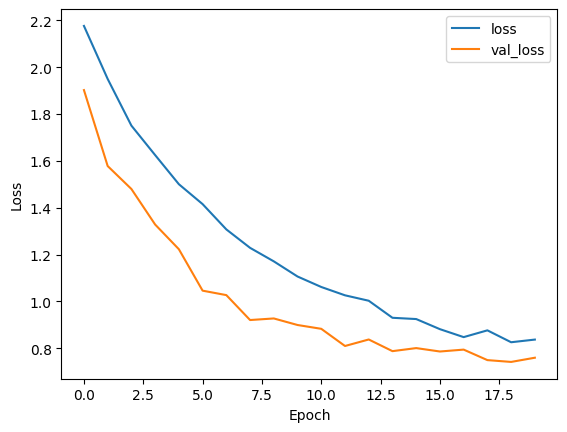

In [71]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

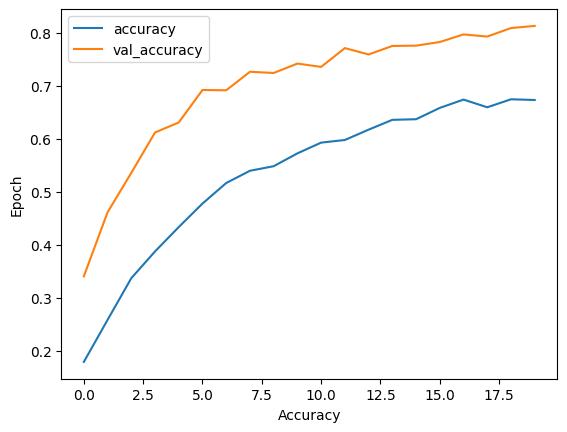

In [73]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.ylabel("Epoch")
plt.xlabel("Accuracy")

plt.legend()

plt.show()

Evaluating the Model

In [75]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 5s 91ms/step - loss: 0.6363 - accuracy: 0.8300


[0.636305034160614, 0.829994261264801]

In [80]:
prediction_result = model.predict(X_test[789].reshape(1,112,150,3))
print(prediction_result)
predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()
print(f"\nThis image belongs to class {predicted_class} with probability {predicted_probability}. The actual class {y_test[789]}.")

1/1 [==============================] - 0s 27ms/step
[[2.0888967e-03 3.4999021e-03 8.2673265e-05 2.4521412e-04 7.3988712e-01
  4.5773466e-03 1.1155832e-02 2.3785268e-01 2.0500982e-05 5.8986718e-04]]

This image belongs to class 4 with probability 0.7398871183395386. The actual class 4.
